In [17]:
from sklearn import datasets
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [18]:
oliv = datasets.fetch_olivetti_faces() # downloading the olivetti faces

In [19]:
oliv.data.shape #checking the shape of the data

(400, 4096)

In [20]:
oliv.keys() # this is basically a dict so finding the keys 

dict_keys(['data', 'images', 'target', 'DESCR'])

In [21]:
print(oliv.images.shape) # if you see here image has 64 pixes when we tranfer to data it will becom 64 * 64 = 4096
# you can see here
print('data: ', oliv.data.shape)

(400, 64, 64)
data:  (400, 4096)


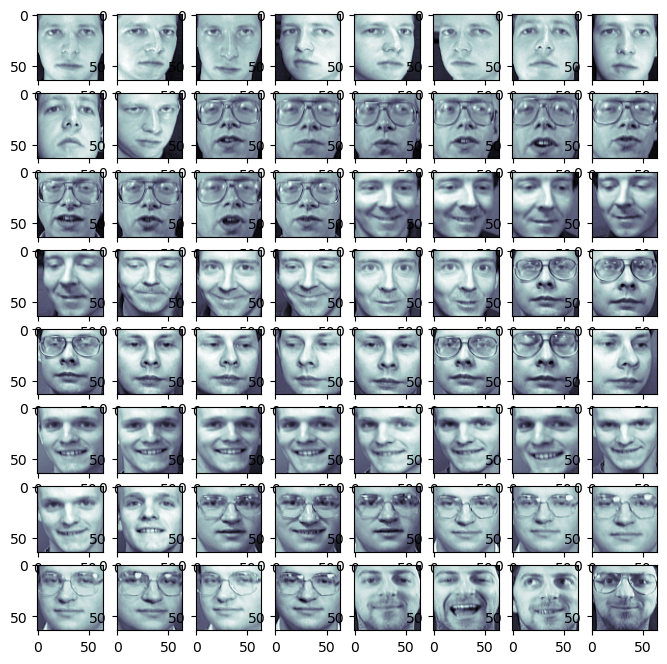

In [22]:
# plotting the images using matplotlib
# figsize = (width, height) you can treat as columns and rows
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i+1)
    ax.imshow(oliv.images[i], cmap=plt.cm.bone)
plt.show()

In [23]:
X = oliv.data # extracting the images data

In [24]:
def find_optimal_k(X, score): # this is a function to find optimal k means how many featurs or components to keep to get better score
    pca = PCA() # creating PCA default it will create new components with all features we have
    pca.fit_transform(X) # fitting the data
    k = 0 # this is feature value default taking 0 
    total = sum(pca.explained_variance_) # finding the total sum of explained_varaince_ -> eigenvalues
    current_varaince = 0 # current variance update for every iterationE -> cr
    while current_varaince/total < score: # checking the condition cr / total < score
        current_varaince += pca.explained_variance_[k]  # updating the current variance for every iteration
        k = k + 1 # updating the k
    return k # after conding met false it exit loop and returning the k

In [25]:
print("before PCA: ", X.shape)
k = find_optimal_k(X, 0.99) # here i am giving 0.99 score it runs the above function and it will return k
pca = PCA(n_components=k) # passing the k as n_component it keeps the k components which have high variances
X_pca = pca.fit_transform(X) # fitting the data
print("after PCA: ", X_pca.shape) # you see we are reducing the dimensions 

before PCA:  (400, 4096)
after PCA:  (400, 260)


In [26]:
print("before PCA: ", X.shape)
k = find_optimal_k(X, 0.95) # for this i am giving 0.95 score it is more than enough
pca = PCA(n_components=k)
X_pca = pca.fit_transform(X)
X_pca.shape
print("after PCA: ", X_pca.shape) # here you can find we can observe lot difference in dimensions
# Note: 123 features are contributing maximum data in images

before PCA:  (400, 4096)
after PCA:  (400, 123)


# Reproducing the images

In [27]:
# getting back images from the lower dimensional data
x_approx = pca.inverse_transform(X_pca) # getting back images inverse tranforming the pca data into original data
x_approx_images = x_approx.reshape((400, 64, 64)) 
x_approx_images.shape # here we get approx images after reducing the dimensions

(400, 64, 64)

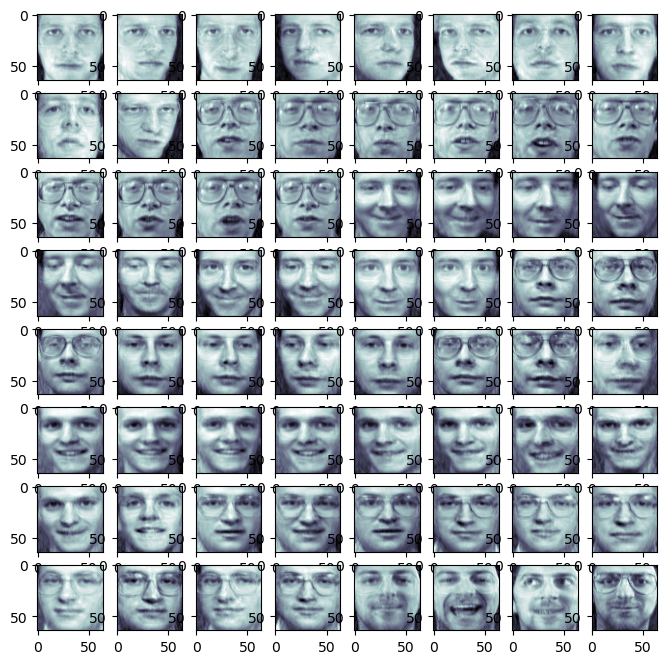

In [28]:
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8,8, i+1)
    ax.imshow(x_approx_images[i], cmap=plt.cm.bone)
plt.show() # in this you can find that much difference before and after pca

# finding the eigenfaces

In [29]:
eigenvectores = pca.components_ #in case of images we called eigenvectors as eigenfaces
eigenvectores.shape

(123, 4096)

In [30]:
eigenfaces = eigenvectores.reshape((123, 64, 64))
eigenfaces.shape

(123, 64, 64)

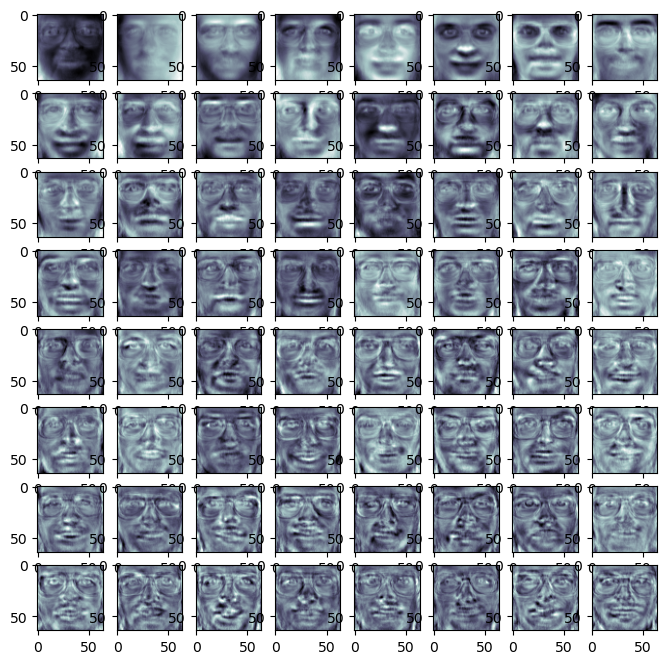

In [31]:
# each eigen faces are focusing on different aspect some may be eyes, spects, nose, lips all of these you can
# observe in the below faces
fig = plt.figure(figsize=(8,8))
for i in range(64):
    ax = fig.add_subplot(8, 8, i+1)
    ax.imshow(eigenfaces[i], cmap=plt.cm.bone)